In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

In [2]:
data=pd.read_excel("Employee_attrition.xlsx")

In [6]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life_Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research_Development,8,1,Life_Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research_Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research_Development,3,4,Life_Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research_Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
#as we can see there are no missing values in the dataset
#if there were any, we would drop NAs

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [8]:
data_num=data.select_dtypes(exclude="object")
data_obj=data.select_dtypes(include="object")

In [9]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
Age                         1470 non-null int64
DailyRate                   1470 non-null int64
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobSatisfaction             1470 non-null int64
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
PercentSalaryHike           1470 non-null int64
PerformanceRating           1470 non-null int64
RelationshipSatisfaction    1470 non-null int64
StandardHours               1470 non-null int64
StockOptionLevel            1

In [10]:
data_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 9 columns):
Attrition         1470 non-null object
BusinessTravel    1470 non-null object
Department        1470 non-null object
EducationField    1470 non-null object
Gender            1470 non-null object
JobRole           1470 non-null object
MaritalStatus     1470 non-null object
Over18            1470 non-null object
OverTime          1470 non-null object
dtypes: object(9)
memory usage: 103.4+ KB


In [11]:
#we will drop "StandardHours" since there we have 0 variance
data_num.var()==0

Age                         False
DailyRate                   False
DistanceFromHome            False
Education                   False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours                True
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
dtype: bool

In [12]:
data_num=data_num.drop(columns="StandardHours")

In [15]:
#"Over18" is a variable with 1 unique value,so we will drop it

for i in data_obj.columns:
    print(i,":")
    print(data_obj[i].unique())

Attrition :
['Yes' 'No']
BusinessTravel :
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department :
['Sales' 'Research_Development' 'Human_Resources']
EducationField :
['Life_Sciences' 'Other' 'Medical' 'Marketing' 'Technical_Degree'
 'Human_Resources']
Gender :
['Female' 'Male']
JobRole :
['Sales_Executive' 'Research_Scientist' 'Laboratory_Technician'
 'Manufacturing_Director' 'Healthcare_Representative' 'Manager'
 'Sales_Representative' 'Research_Director' 'Human_Resources']
MaritalStatus :
['Single' 'Married' 'Divorced']
Over18 :
['Y']
OverTime :
['Yes' 'No']


In [16]:
data_obj=data_obj.drop(columns="Over18")

In [17]:
#creating dummy variables for objects

data_dummies=pd.get_dummies(data_obj,prefix=data_obj.columns,drop_first=True)

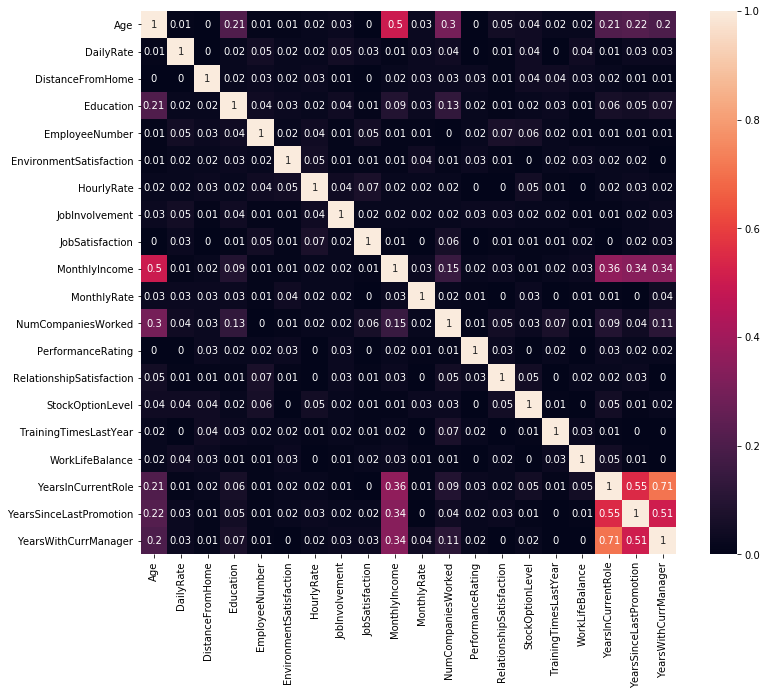

In [26]:
#checking for the correlation 
#we will drop highly correlated variables 

plt.figure(figsize=(12,10))
sns.heatmap(data_num.corr().abs().round(2),annot=True)
plt.show()

In [19]:
data_num=data_num.drop(columns="EmployeeCount")

In [20]:
data_num=data_num.drop(columns="YearsAtCompany")

In [21]:
data_num=data_num.drop(columns="JobLevel")

In [22]:
data_num=data_num.drop(columns="TotalWorkingYears")

In [23]:
data_num=data_num.drop(columns="PercentSalaryHike")

In [24]:
#after making relevant preparation, we can join the data

data_final=data_num.join(data_dummies)

In [25]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 42 columns):
Age                                 1470 non-null int64
DailyRate                           1470 non-null int64
DistanceFromHome                    1470 non-null int64
Education                           1470 non-null int64
EmployeeNumber                      1470 non-null int64
EnvironmentSatisfaction             1470 non-null int64
HourlyRate                          1470 non-null int64
JobInvolvement                      1470 non-null int64
JobSatisfaction                     1470 non-null int64
MonthlyIncome                       1470 non-null int64
MonthlyRate                         1470 non-null int64
NumCompaniesWorked                  1470 non-null int64
PerformanceRating                   1470 non-null int64
RelationshipSatisfaction            1470 non-null int64
StockOptionLevel                    1470 non-null int64
TrainingTimesLastYear               1470 non-null int

# Logistic Regression

In [27]:
data_final.Attrition_Yes.value_counts()/len(data_final)*100

0    83.877551
1    16.122449
Name: Attrition_Yes, dtype: float64

As we can see the probability that a new employee will not leave the company is 83%, while the probability that he/she will leave is just 16%

In [28]:
Y=data_final.Attrition_Yes
X=data_final.drop("Attrition_Yes",axis=1)

In [29]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [30]:
formula="Attrition_Yes~" + "+".join(X.columns.tolist())
formula

'Attrition_Yes~Age+DailyRate+DistanceFromHome+Education+EmployeeNumber+EnvironmentSatisfaction+HourlyRate+JobInvolvement+JobSatisfaction+MonthlyIncome+MonthlyRate+NumCompaniesWorked+PerformanceRating+RelationshipSatisfaction+StockOptionLevel+TrainingTimesLastYear+WorkLifeBalance+YearsInCurrentRole+YearsSinceLastPromotion+YearsWithCurrManager+BusinessTravel_Travel_Frequently+BusinessTravel_Travel_Rarely+Department_Research_Development+Department_Sales+EducationField_Life_Sciences+EducationField_Marketing+EducationField_Medical+EducationField_Other+EducationField_Technical_Degree+Gender_Male+JobRole_Human_Resources+JobRole_Laboratory_Technician+JobRole_Manager+JobRole_Manufacturing_Director+JobRole_Research_Director+JobRole_Research_Scientist+JobRole_Sales_Executive+JobRole_Sales_Representative+MaritalStatus_Married+MaritalStatus_Single+OverTime_Yes'

In [31]:
logit=Logit.from_formula(formula=formula, data=data_final).fit()

         Current function value: 0.294829
         Iterations: 35


/Applications/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [32]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1428
Method:                           MLE   Df Model:                           41
Date:                Sat, 10 Nov 2018   Pseudo R-squ.:                  0.3325
Time:                        18:59:38   Log-Likelihood:                -433.40
converged:                      False   LL-Null:                       -649.29
                                        LLR p-value:                 1.160e-66
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          -10.8938   1023.960     -0.011      0.992   -2017.820    1996.032
Age                                 -0.0432      0.012     -3.541      0.000      -0.067      -0.019
DailyRate                           -0.0003      0.000     -1.388      0.165      -0.001       0.000
DistanceFromHome                     0.0438      0.011      4.102      0.000       0.023       0.065
Education                            0.0093      0.088      0.107      0.915      -0.163       0.181
EmployeeNumber                      -0.0001      0.000     -0.898      0.369      -0.000       0.000
EnvironmentSatisfaction             -0.4187      0.082     -5.083      0.000      -0.580      -0.257
HourlyRate                           0.0016      0.004      0.370      0.711      -0.007       0.010
JobInvolvement                      -0.5277      0.121     -4.355      0.000      -0.765      -0.290
JobSatisfaction                     -0.3978      0.080     -4.943      0.000      -0.556      -0.240
MonthlyIncome                    -2.831e-05   5.22e-05     -0.542      0.588      -0.000     7.4e-05
MonthlyRate                       4.199e-06   1.25e-05      0.337      0.736   -2.02e-05    2.86e-05
NumCompaniesWorked                   0.1650      0.037      4.425      0.000       0.092       0.238
PerformanceRating                   -0.0989      0.250     -0.395      0.693      -0.589       0.391
RelationshipSatisfaction            -0.2515      0.082     -3.057      0.002      -0.413      -0.090
StockOptionLevel                    -0.1900      0.158     -1.206      0.228      -0.499       0.119
TrainingTimesLastYear               -0.1835      0.073     -2.525      0.012      -0.326      -0.041
WorkLifeBalance                     -0.3637      0.123     -2.946      0.003      -0.606      -0.122
YearsInCurrentRole                  -0.1156      0.042     -2.741      0.006      -0.198      -0.033
YearsSinceLastPromotion              0.2008      0.040      4.972      0.000       0.122       0.280
YearsWithCurrManager                -0.0985      0.042     -2.368      0.018      -0.180      -0.017
BusinessTravel_Travel_Frequently     1.8665      0.408      4.577      0.000       1.067       2.666
BusinessTravel_Travel_Rarely         0.9709      0.376      2.582      0.010       0.234       1.708
Department_Research_Development     13.5900   1023.960      0.013      0.989   -1993.334    2020.514
Department_Sales                    13.3493   1023.960      0.013      0.990   -1993.575    2020.273
EducationField_Life_Sciences        -0.7139      0.801     -0.891      0.373      -2.285       0.857
EducationField_Marketing            -0.3214      0.849     -0.379      0.705      -1.986       1.343
EducationField_Medical              -0.7941      0.801     -0.992      0.321      -2.363       0.775
EducationField_Other                -0.8147      0.861     -0.947      0.344      -2.501       0.872
Education

From the results we should interpret only those variables that are statistically significant(have p-value less than 0.05).

Thus,the following variables are statistically significant:
Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,NumCompaniesWorked,
RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsInCurrentRole,YearsWithCurrManager,
YearsSinceLastPromotion,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender_Male,
JobRole_Laboratory_Technician,JobRole_Sales_Representative,MaritalStatus_Single,OverTime_Yes

From these statistically significant variables, those that have positive coefficients will increase the probability of an employee attrition,while those that have negative coefficients will decrease the probability of an employee attrition.

In [33]:
logit_sk=LogisticRegression()

In [34]:
logit_sk=logit_sk.fit(x_train,y_train)

In [35]:
logit_sk.score(x_test,y_test)

0.8804347826086957

As we can see our model has 88% overall accuracy on the test set.

# Decision Tree

In [36]:
tree_1=DecisionTreeClassifier(random_state=42)
tree_1.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [37]:
importances=tree_1.feature_importances_
importances=pd.DataFrame(data=importances, index=X.columns, columns=['importances'])

In [38]:
importances.sort_values(by="importances", ascending=False)

,importances
MonthlyIncome,0.142486
DailyRate,0.090195
EmployeeNumber,0.080821
OverTime_Yes,0.075114
Age,0.069635
YearsInCurrentRole,0.051618
HourlyRate,0.045605
NumCompaniesWorked,0.044997
YearsSinceLastPromotion,0.040302
MonthlyRate,0.038930


As we can see only the first 6 variables have relatively higher importance compared to others.

In addition,the most important variable is "MonthlyIncome".

In [39]:
tree_1.score(x_test,y_test)

0.782608695652174

In our Decision Tree_1 model overall accuracy is lower (78%) than in Logistic Regression model (88%). 

In [40]:
#now we will cut the tree and then check accuracy again.

tree_2=DecisionTreeClassifier(max_depth=3,min_samples_leaf=100,random_state=42)
tree_2.fit(x_train,y_train)
tree_2.score(x_test,y_test)

0.8532608695652174

In our new Decision Tree_2 model accuracy is much higher.

In [41]:
#we can visually see the tree by putting the code from the word file saved into this 
#webpage http://webgraphviz.com/

tree_gr2=export_graphviz(tree_2,out_file="tree2.dot", class_names=True, feature_names=X.columns, filled=True)

In cunclusion, although we increased the accuracy in Decision Tree model by cutting the tree(from 78% to 85%), Logistic Regression still has higher accuracy (88%) compared to that of the Decision Tree. 